# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Himbar Buana
- **Email:** mhimbarbuana@gmail.com
- **ID Dicoding:** himbarbuana

## Menentukan Pertanyaan Bisnis

1. **Bagaimana pengaruh kondisi cuaca (musim, suhu, kelembaban) terhadap jumlah penyewaan sepeda?**
2. **Pada jam dan hari apa penyewaan sepeda mencapai puncaknya, dan bagaimana perbedaan pola antara pengguna casual dan registered?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Data day.csv

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    str    
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), str(1)
memory usage: 91.5 KB


#### Load Data hour.csv

In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  str    
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), str(1)
memory usage: 2.3 MB


### Assessing Data

#### Mengecek Missing Values pada day_df

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** Tidak ada missing values pada dataset day_df.

#### Mengecek Missing Values pada hour_df

In [7]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** Tidak ada missing values pada dataset hour_df.

#### Mengecek Duplikasi Data

In [8]:
print("Jumlah duplikasi pada day_df:", day_df.duplicated().sum())
print("Jumlah duplikasi pada hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi pada day_df: 0
Jumlah duplikasi pada hour_df: 0


**Insight:** Tidak ada data duplikat pada kedua dataset.

#### Mengecek Statistik Deskriptif

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data mencakup periode 2 tahun (2011-2012) dengan 731 hari dan 17.379 jam.
- Rata-rata penyewaan harian adalah sekitar 4.504 sepeda.
- Terdapat variasi yang cukup besar dalam jumlah penyewaan (min: 22, max: 8.714).
- Pengguna registered lebih banyak dari casual (rata-rata 3.656 vs 848 per hari).

#### Mengecek Tipe Data

In [11]:
day_df.dtypes

instant         int64
dteday            str
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**Masalah yang ditemukan:**
- Kolom `dteday` bertipe object, seharusnya datetime.
- Kolom kategorikal seperti `season`, `weathersit`, `weekday` masih bertipe int64.

### Cleaning Data

#### Mengubah Tipe Data

In [12]:
# Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
# Membuat mapping untuk kolom kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
year_map = {0: 2011, 1: 2012}

In [14]:
# Menerapkan mapping pada day_df
day_df['season_name'] = day_df['season'].map(season_map)
day_df['weather_name'] = day_df['weathersit'].map(weather_map)
day_df['weekday_name'] = day_df['weekday'].map(weekday_map)
day_df['month_name'] = day_df['mnth'].map(month_map)
day_df['year'] = day_df['yr'].map(year_map)

In [15]:
# Menerapkan mapping pada hour_df
hour_df['season_name'] = hour_df['season'].map(season_map)
hour_df['weather_name'] = hour_df['weathersit'].map(weather_map)
hour_df['weekday_name'] = hour_df['weekday'].map(weekday_map)
hour_df['month_name'] = hour_df['mnth'].map(month_map)
hour_df['year'] = hour_df['yr'].map(year_map)

In [16]:
# Denormalisasi nilai suhu, kelembaban, dan kecepatan angin
# temp: nilai asli = temp * 41
# atemp: nilai asli = atemp * 50
# hum: nilai asli = hum * 100
# windspeed: nilai asli = windspeed * 67

day_df['temp_actual'] = day_df['temp'] * 41
day_df['atemp_actual'] = day_df['atemp'] * 50
day_df['hum_actual'] = day_df['hum'] * 100
day_df['windspeed_actual'] = day_df['windspeed'] * 67

hour_df['temp_actual'] = hour_df['temp'] * 41
hour_df['atemp_actual'] = hour_df['atemp'] * 50
hour_df['hum_actual'] = hour_df['hum'] * 100
hour_df['windspeed_actual'] = hour_df['windspeed'] * 67

In [17]:
# Verifikasi hasil cleaning
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,season_name,weather_name,weekday_name,month_name,year,temp_actual,atemp_actual,hum_actual,windspeed_actual
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,985,Spring,Mist,Saturday,Jan,2011,14.110847,18.18125,80.5833,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,801,Spring,Mist,Sunday,Jan,2011,14.902598,17.68695,69.6087,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1349,Spring,Clear,Monday,Jan,2011,8.050924,9.47025,43.7273,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1562,Spring,Clear,Tuesday,Jan,2011,8.200000,10.60610,59.0435,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1600,Spring,Clear,Wednesday,Jan,2011,9.305237,11.46350,43.6957,12.522300


In [18]:
day_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dteday            731 non-null    datetime64[us]
 2   season            731 non-null    int64         
 3   yr                731 non-null    int64         
 4   mnth              731 non-null    int64         
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weathersit        731 non-null    int64         
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-null    int

**Hasil Cleaning Data:**
- Kolom `dteday` sudah diubah menjadi tipe datetime.
- Kolom kategorikal sudah ditambahkan label yang lebih mudah dipahami.
- Nilai suhu, kelembaban, dan kecepatan angin sudah didenormalisasi ke nilai asli.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan Bisnis 1: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda

#### Analisis Berdasarkan Musim

In [19]:
season_stats = day_df.groupby('season_name').agg({
    'cnt': ['mean', 'sum', 'std'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)
season_stats

cnt                     casual registered
                mean      sum      std     mean       mean
season_name                                               
Fall         5644.30  1061129  1459.80  1202.61    4441.69
Spring       2604.13   471348  1399.94   334.93    2269.20
Summer       4992.33   918589  1695.98  1106.10    3886.23
Winter       4728.16   841613  1699.62   729.11    3999.05

**Insight:** Musim Fall (gugur) memiliki rata-rata penyewaan tertinggi, sedangkan Spring (semi) memiliki yang terendah.

#### Analisis Berdasarkan Kondisi Cuaca

In [20]:
weather_stats = day_df.groupby('weather_name').agg({
    'cnt': ['mean', 'sum', 'count'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)
weather_stats

cnt                 casual registered
                    mean      sum count    mean       mean
weather_name                                              
Clear            4876.79  2257952   463  964.03    3912.76
Light Rain/Snow  1803.29    37869    21  185.48    1617.81
Mist             4035.86   996858   247  687.35    3348.51

**Insight:** Cuaca cerah (Clear) menghasilkan penyewaan tertinggi, sedangkan cuaca buruk (Light Rain/Snow) menurunkan jumlah penyewaan secara signifikan.

#### Korelasi Suhu dan Kelembaban dengan Penyewaan

In [21]:
correlation_cols = ['temp_actual', 'atemp_actual', 'hum_actual', 'windspeed_actual', 'cnt', 'casual', 'registered']
correlation_matrix = day_df[correlation_cols].corr()
correlation_matrix

,temp_actual,atemp_actual,hum_actual,windspeed_actual,cnt,casual,registered
temp_actual,1.000000,0.991702,0.126963,-0.157944,0.627494,0.543285,0.540012
atemp_actual,0.991702,1.000000,0.139988,-0.183643,0.631066,0.543864,0.544192
hum_actual,0.126963,0.139988,1.000000,-0.248489,-0.100659,-0.077008,-0.091089
windspeed_actual,-0.157944,-0.183643,-0.248489,1.000000,-0.234545,-0.167613,-0.217449
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000,0.672804,0.945517
casual,0.543285,0.543864,-0.077008,-0.167613,0.672804,1.000000,0.395282
registered,0.540012,0.544192,-0.091089,-0.217449,0.945517,0.395282,1.000000


**Insight:**
- Suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan (~0.63).
- Kelembaban (hum) memiliki korelasi negatif dengan penyewaan (~-0.10).
- Kecepatan angin memiliki korelasi negatif lemah dengan penyewaan.

### Explore Pertanyaan Bisnis 2: Pola Penyewaan Berdasarkan Waktu

#### Analisis Penyewaan per Jam

In [22]:
hourly_stats = hour_df.groupby('hr').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).round(2)
hourly_stats

,cnt,casual,registered
hr,,,
0,53.90,10.16,43.74
1,33.38,6.50,26.87
2,22.87,4.77,18.10
3,11.73,2.72,9.01
4,6.35,1.25,5.10
5,19.89,1.41,18.48
6,76.04,4.16,71.88
7,212.06,11.06,201.01
8,359.01,21.68,337.33


**Insight:** Terdapat dua puncak penyewaan: pagi (jam 8) dan sore (jam 17-18), terutama untuk pengguna registered yang kemungkinan adalah commuter.

#### Analisis Penyewaan per Hari

In [23]:
# Mengatur urutan hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df['weekday_name'] = pd.Categorical(day_df['weekday_name'], categories=day_order, ordered=True)

weekday_stats = day_df.groupby('weekday_name').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).round(2)
weekday_stats

,cnt,casual,registered
weekday_name,,,
Monday,4338.12,674.13,3663.99
Tuesday,4510.66,556.18,3954.48
Wednesday,4548.54,551.14,3997.39
Thursday,4667.26,590.96,4076.30
Friday,4690.29,752.29,3938.00
Saturday,4550.54,1465.26,3085.29
Sunday,4228.83,1338.30,2890.53


**Insight:**
- Pengguna casual lebih banyak di akhir pekan (Saturday, Sunday).
- Pengguna registered relatif stabil di hari kerja dan sedikit menurun di akhir pekan.

#### Perbandingan Pola Pengguna Casual vs Registered

In [24]:
# Analisis berdasarkan working day
workingday_stats = day_df.groupby('workingday').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).round(2)
workingday_stats.index = ['Weekend/Holiday', 'Working Day']
workingday_stats

,cnt,casual,registered
Weekend/Holiday,4330.17,1371.13,2959.03
Working Day,4584.82,606.57,3978.25


**Insight:**
- Pengguna casual meningkat 2x lipat pada weekend/holiday dibanding hari kerja.
- Pengguna registered sedikit lebih tinggi pada hari kerja.

### Analisis Lanjutan: Clustering Berdasarkan Pola Penyewaan

**Tujuan Analisis Clustering:**
Teknik clustering (pengelompokan) ini bertujuan untuk mengelompokkan hari-hari berdasarkan tingkat penyewaan sepeda menggunakan metode **Manual Grouping/Binning**. Dengan mengelompokkan data ke dalam kategori tertentu, kita dapat:

1. Mengidentifikasi karakteristik hari dengan penyewaan tinggi vs rendah
2. Menemukan pola cuaca dan kondisi yang mempengaruhi tingkat penyewaan
3. Memberikan insight untuk perencanaan operasional dan strategi bisnis

**Metode yang Digunakan:** Binning berdasarkan jumlah penyewaan harian ke dalam 4 kategori:
- **Low:** < 2,000 penyewaan/hari
- **Medium:** 2,000 - 4,000 penyewaan/hari  
- **High:** 4,000 - 6,000 penyewaan/hari
- **Very High:** > 6,000 penyewaan/hari

In [25]:
# Membuat kategori berdasarkan jumlah penyewaan
def categorize_rental(cnt):
    if cnt < 2000:
        return 'Low'
    elif cnt < 4000:
        return 'Medium'
    elif cnt < 6000:
        return 'High'
    else:
        return 'Very High'

day_df['rental_category'] = day_df['cnt'].apply(categorize_rental)

In [26]:
# Analisis karakteristik setiap kategori
category_stats = day_df.groupby('rental_category').agg({
    'temp_actual': 'mean',
    'hum_actual': 'mean',
    'windspeed_actual': 'mean',
    'cnt': ['count', 'mean']
}).round(2)
category_stats

temp_actual hum_actual windspeed_actual   cnt         
                       mean       mean             mean count     mean
rental_category                                                       
High                  22.71      63.19            12.46   272  4862.59
Low                   11.08      63.14            15.00    98  1394.78
Medium                16.49      63.98            13.49   181  3108.02
Very High             25.55      60.79            11.28   180  7060.08

**Insight dari Clustering:**
- Hari dengan penyewaan 'Very High' cenderung memiliki suhu lebih tinggi dan kelembaban lebih rendah.
- Hari dengan penyewaan 'Low' biasanya terjadi pada kondisi cuaca kurang mendukung.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda

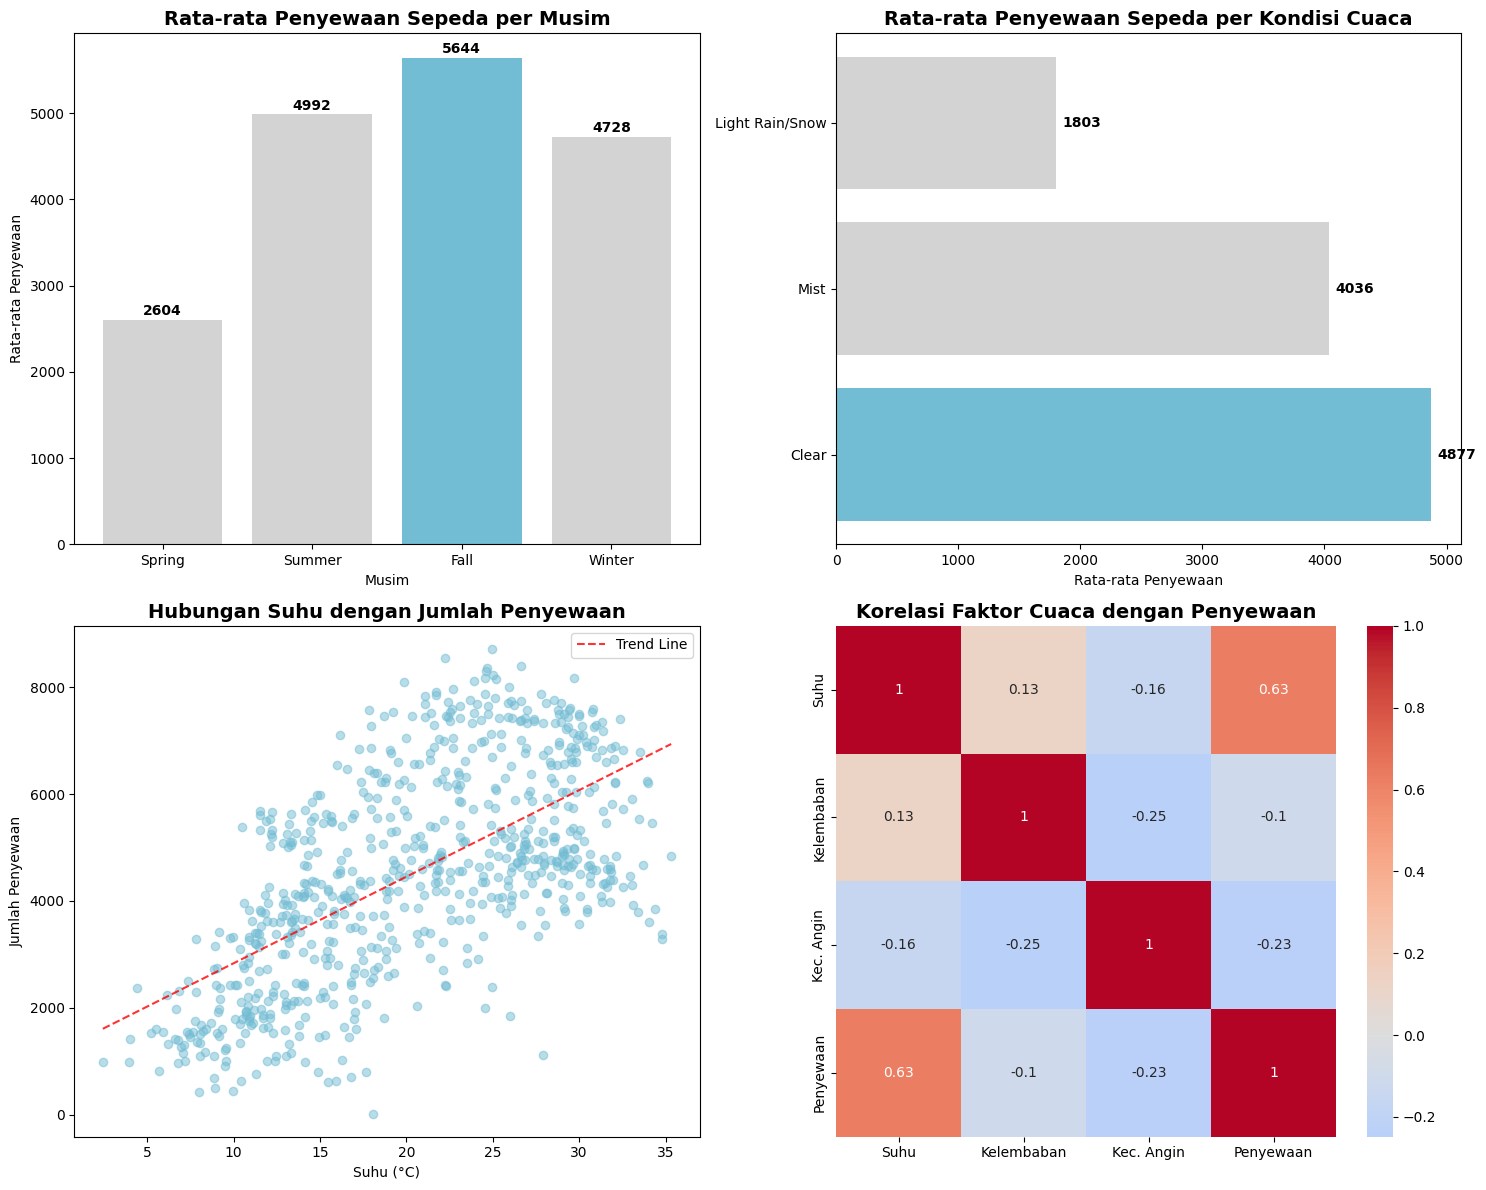

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Penyewaan per Musim
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_rental = day_df.groupby('season_name')['cnt'].mean().reindex(season_order)

colors = ['#D3D3D3', '#D3D3D3', '#72BCD4', '#D3D3D3']  # Highlight Fall
axes[0, 0].bar(season_rental.index, season_rental.values, color=colors)
axes[0, 0].set_title('Rata-rata Penyewaan Sepeda per Musim', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Musim')
axes[0, 0].set_ylabel('Rata-rata Penyewaan')
for i, v in enumerate(season_rental.values):
    axes[0, 0].text(i, v + 50, f'{v:.0f}', ha='center', fontweight='bold')

# 2. Penyewaan per Kondisi Cuaca
weather_rental = day_df.groupby('weather_name')['cnt'].mean().sort_values(ascending=False)
colors2 = ['#72BCD4', '#D3D3D3', '#D3D3D3']
axes[0, 1].barh(weather_rental.index, weather_rental.values, color=colors2)
axes[0, 1].set_title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rata-rata Penyewaan')
for i, v in enumerate(weather_rental.values):
    axes[0, 1].text(v + 50, i, f'{v:.0f}', va='center', fontweight='bold')

# 3. Scatter Plot Suhu vs Penyewaan
axes[1, 0].scatter(day_df['temp_actual'], day_df['cnt'], alpha=0.5, c='#72BCD4')
z = np.polyfit(day_df['temp_actual'], day_df['cnt'], 1)
p = np.poly1d(z)
axes[1, 0].plot(day_df['temp_actual'].sort_values(), p(day_df['temp_actual'].sort_values()), 
                "r--", alpha=0.8, label=f'Trend Line')
axes[1, 0].set_title('Hubungan Suhu dengan Jumlah Penyewaan', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Suhu (°C)')
axes[1, 0].set_ylabel('Jumlah Penyewaan')
axes[1, 0].legend()

# 4. Heatmap Korelasi
correlation_cols = ['temp_actual', 'hum_actual', 'windspeed_actual', 'cnt']
corr_matrix = day_df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1], 
            xticklabels=['Suhu', 'Kelembaban', 'Kec. Angin', 'Penyewaan'],
            yticklabels=['Suhu', 'Kelembaban', 'Kec. Angin', 'Penyewaan'])
axes[1, 1].set_title('Korelasi Faktor Cuaca dengan Penyewaan', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('dashboard/weather_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

**Kesimpulan Pertanyaan 1:**
- **Musim Fall (Gugur)** memiliki rata-rata penyewaan tertinggi, diikuti Summer dan Winter.
- **Cuaca Cerah** secara signifikan meningkatkan jumlah penyewaan dibanding cuaca berkabut atau hujan.
- **Suhu** memiliki korelasi positif kuat dengan penyewaan (korelasi ~0.63).
- **Kelembaban dan kecepatan angin** memiliki korelasi negatif dengan penyewaan.

### Pertanyaan 2: Pola Penyewaan Berdasarkan Waktu

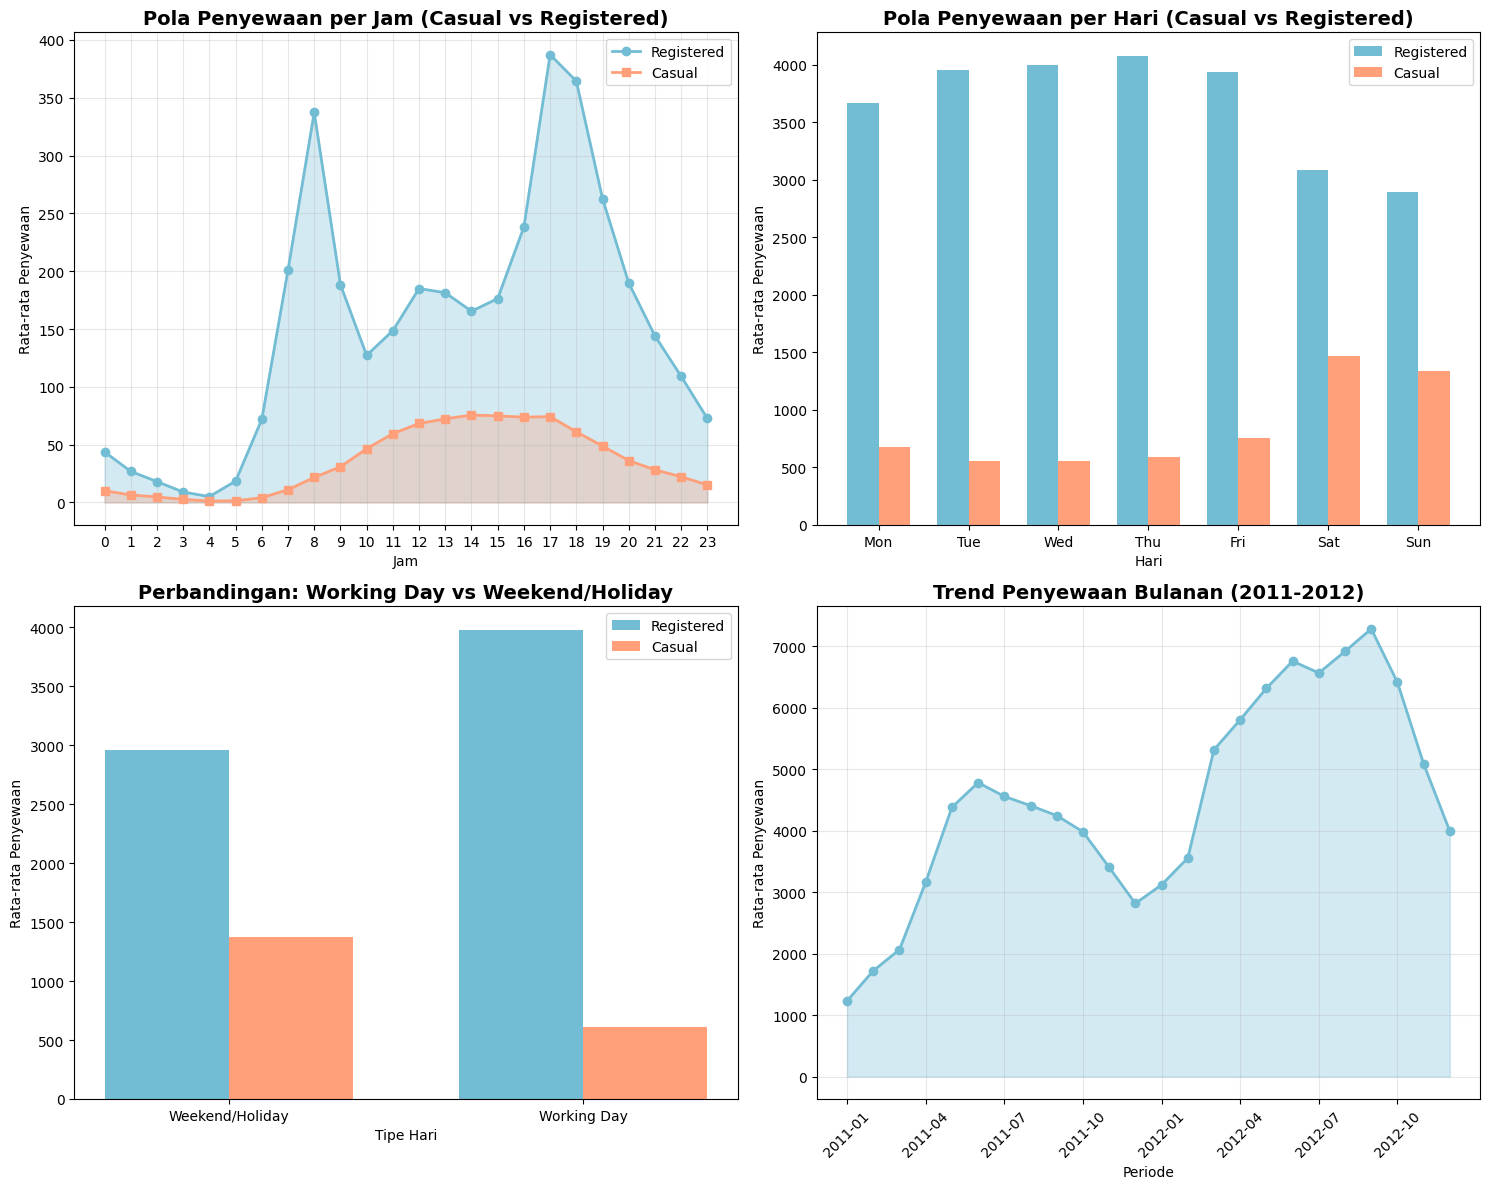

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Penyewaan per Jam
hourly_avg = hour_df.groupby('hr')[['casual', 'registered', 'cnt']].mean()
axes[0, 0].plot(hourly_avg.index, hourly_avg['registered'], marker='o', label='Registered', color='#72BCD4', linewidth=2)
axes[0, 0].plot(hourly_avg.index, hourly_avg['casual'], marker='s', label='Casual', color='#FFA07A', linewidth=2)
axes[0, 0].fill_between(hourly_avg.index, hourly_avg['registered'], alpha=0.3, color='#72BCD4')
axes[0, 0].fill_between(hourly_avg.index, hourly_avg['casual'], alpha=0.3, color='#FFA07A')
axes[0, 0].set_title('Pola Penyewaan per Jam (Casual vs Registered)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Jam')
axes[0, 0].set_ylabel('Rata-rata Penyewaan')
axes[0, 0].legend()
axes[0, 0].set_xticks(range(0, 24))
axes[0, 0].grid(True, alpha=0.3)

# 2. Penyewaan per Hari dalam Seminggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = day_df.groupby('weekday_name')[['casual', 'registered']].mean().reindex(day_order)

x = np.arange(len(day_order))
width = 0.35
axes[0, 1].bar(x - width/2, weekday_avg['registered'], width, label='Registered', color='#72BCD4')
axes[0, 1].bar(x + width/2, weekday_avg['casual'], width, label='Casual', color='#FFA07A')
axes[0, 1].set_title('Pola Penyewaan per Hari (Casual vs Registered)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Hari')
axes[0, 1].set_ylabel('Rata-rata Penyewaan')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[0, 1].legend()

# 3. Penyewaan: Working Day vs Weekend/Holiday
workday_casual = day_df.groupby('workingday')['casual'].mean()
workday_registered = day_df.groupby('workingday')['registered'].mean()

labels = ['Weekend/Holiday', 'Working Day']
x = np.arange(len(labels))
axes[1, 0].bar(x - width/2, workday_registered, width, label='Registered', color='#72BCD4')
axes[1, 0].bar(x + width/2, workday_casual, width, label='Casual', color='#FFA07A')
axes[1, 0].set_title('Perbandingan: Working Day vs Weekend/Holiday', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tipe Hari')
axes[1, 0].set_ylabel('Rata-rata Penyewaan')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(labels)
axes[1, 0].legend()

# 4. Trend Penyewaan Bulanan
monthly_trend = day_df.groupby(['year', 'mnth'])[['cnt', 'casual', 'registered']].mean().reset_index()
monthly_trend['period'] = monthly_trend['year'].astype(str) + '-' + monthly_trend['mnth'].astype(str).str.zfill(2)

axes[1, 1].plot(range(len(monthly_trend)), monthly_trend['cnt'], marker='o', color='#72BCD4', linewidth=2)
axes[1, 1].fill_between(range(len(monthly_trend)), monthly_trend['cnt'], alpha=0.3, color='#72BCD4')
axes[1, 1].set_title('Trend Penyewaan Bulanan (2011-2012)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Periode')
axes[1, 1].set_ylabel('Rata-rata Penyewaan')
axes[1, 1].set_xticks(range(0, len(monthly_trend), 3))
axes[1, 1].set_xticklabels(monthly_trend['period'].iloc[::3], rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dashboard/time_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

**Kesimpulan Pertanyaan 2:**
- **Jam Puncak:** Penyewaan mencapai puncak pada jam 8 pagi dan jam 17-18 sore (jam commuter).
- **Pengguna Registered:** Memiliki pola bimodal yang jelas (pagi & sore), menunjukkan penggunaan untuk commuting.
- **Pengguna Casual:** Lebih aktif di siang hari (11-16) dan akhir pekan, menunjukkan penggunaan untuk rekreasi.
- **Weekend vs Weekday:** Casual meningkat 2x lipat di weekend, Registered relatif stabil.
- **Trend Tahunan:** Terdapat pertumbuhan penyewaan dari 2011 ke 2012, dengan pola musiman yang konsisten.

### Visualisasi Tambahan: Analisis Clustering

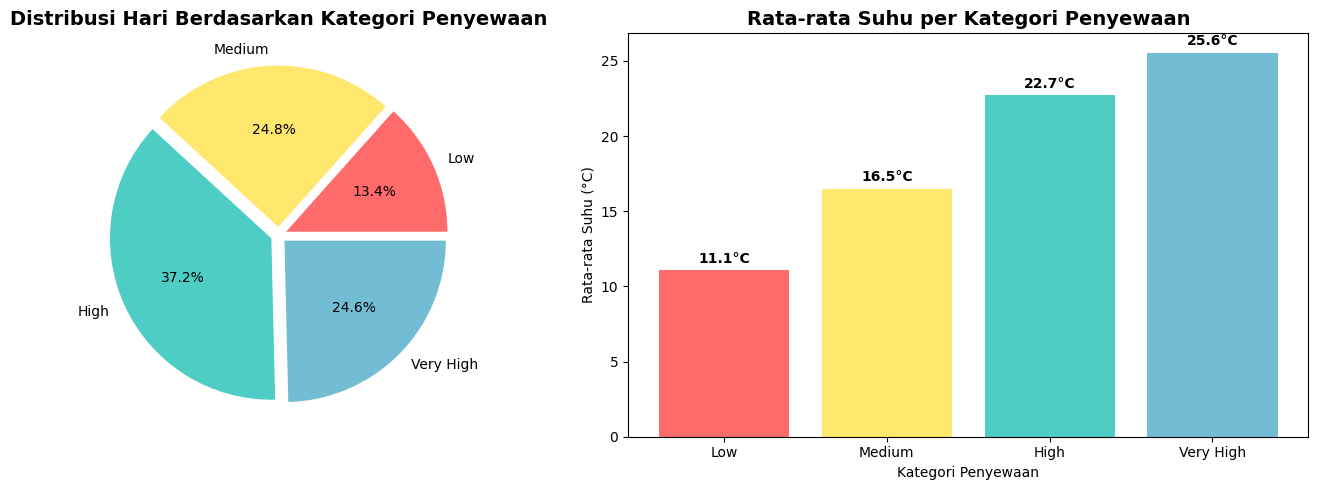

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Distribusi Kategori Penyewaan
category_counts = day_df['rental_category'].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
colors = ['#FF6B6B', '#FFE66D', '#4ECDC4', '#72BCD4']
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors, explode=[0.05]*4)
axes[0].set_title('Distribusi Hari Berdasarkan Kategori Penyewaan', fontsize=14, fontweight='bold')

# 2. Karakteristik per Kategori
category_order = ['Low', 'Medium', 'High', 'Very High']
cat_temp = day_df.groupby('rental_category')['temp_actual'].mean().reindex(category_order)

axes[1].bar(cat_temp.index, cat_temp.values, color=colors)
axes[1].set_title('Rata-rata Suhu per Kategori Penyewaan', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kategori Penyewaan')
axes[1].set_ylabel('Rata-rata Suhu (°C)')
for i, v in enumerate(cat_temp.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}°C', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('dashboard/clustering_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## Conclusion

### Kesimpulan Pertanyaan 1: Pengaruh Kondisi Cuaca

Berdasarkan analisis yang dilakukan, kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda:

1. **Musim:** Musim Fall (Gugur) memiliki rata-rata penyewaan tertinggi, kemungkinan karena suhu yang nyaman. Musim Spring (Semi) memiliki penyewaan terendah.

2. **Kondisi Cuaca:** Cuaca cerah menghasilkan penyewaan ~4.900/hari, sedangkan hujan ringan hanya ~1.800/hari (penurunan ~63%).

3. **Suhu:** Terdapat korelasi positif kuat (r=0.63) antara suhu dan penyewaan. Semakin hangat cuaca, semakin banyak orang yang menyewa sepeda.

4. **Kelembaban & Angin:** Keduanya berkorelasi negatif dengan penyewaan, menunjukkan kondisi yang tidak nyaman menurunkan minat bersepeda.

**Rekomendasi Bisnis:** Perusahaan dapat meningkatkan jumlah sepeda yang tersedia saat cuaca cerah dan suhu hangat, serta memberikan promo/diskon saat cuaca kurang mendukung untuk menjaga tingkat penggunaan.

### Kesimpulan Pertanyaan 2: Pola Penyewaan Berdasarkan Waktu

Analisis pola waktu mengungkapkan karakteristik menarik:

1. **Jam Puncak:** Terdapat dua puncak penyewaan - jam 8 pagi dan jam 17-18 sore - yang selaras dengan jam commuting.

2. **Perbedaan Pengguna:**
   - **Registered (commuter):** Pola bimodal (pagi-sore), lebih aktif di hari kerja
   - **Casual (recreational):** Pola unimodal (puncak siang), lebih aktif di weekend

3. **Working Day vs Weekend:**
   - Pengguna casual meningkat ~100% di weekend/holiday
   - Pengguna registered relatif konsisten sepanjang minggu

4. **Trend Pertumbuhan:** Terdapat peningkatan signifikan dari 2011 ke 2012, menunjukkan adopsi bike sharing yang meningkat.

**Rekomendasi Bisnis:** 
- Fokuskan maintenance di luar jam puncak (10-16 weekday)
- Tambah unit di lokasi rekreasi saat weekend
- Buat program loyalitas untuk meningkatkan konversi casual ke registered

### Menyimpan Data untuk Dashboard

In [30]:
# Menyimpan data yang sudah dibersihkan untuk digunakan di dashboard
day_df.to_csv("dashboard/main_data.csv", index=False)
hour_df.to_csv("dashboard/hour_data.csv", index=False)
print("Data berhasil disimpan untuk dashboard!")

Data berhasil disimpan untuk dashboard!
